<a href="https://colab.research.google.com/github/wei0728/runner/blob/master/MNIST_NN_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#使用神經網路辨識手寫字

#匯入套件

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

#擷取手寫字的資料

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#檢視資料

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
x_train[11111]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75, 105, 245, 253,
        253, 255, 253, 253, 182,  12,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  29, 104, 239, 252, 252, 252,
        252, 253, 252, 252, 252,  29,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

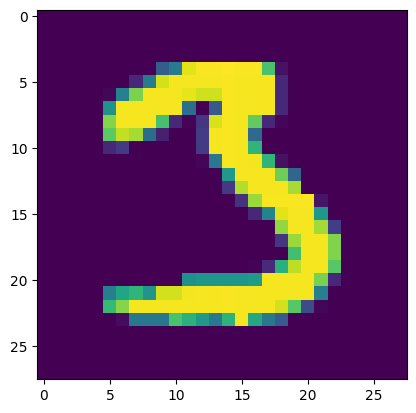

In [12]:
plt.imshow(x_train[11111])

In [13]:
y_train[11111]

3

#結果編碼(one hot encoding)

In [14]:
from tensorflow.python.keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train, 10)
y_test_onehot = np_utils.to_categorical(y_test, 10)
y_train_onehot[11111]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#匯入tensorflow的套件

In [15]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.optimizers import SGD

#建置神經網路模型

In [16]:
from tensorflow.python.keras.utils.data_utils import init_pool_generator

In [17]:
model = Sequential()

model.add(Dense(500,input_dim = 784))
model.add(Activation("sigmoid"))

model.add(Dense(200,input_dim = 784))
model.add(Activation("sigmoid"))

model.add(Dense(100,input_dim = 784))
model.add(Activation("sigmoid"))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="mse", optimizer = "adam",metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [19]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#訓練神經網路

In [20]:
model.fit(x_train, y_train_onehot, epochs = 30, batch_size = 200)

Epoch 1/30
300/300 [==============================] - 7s 3ms/step - loss: 0.0275 - accuracy: 0.8252
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0118 - accuracy: 0.9255
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.9315
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0104 - accuracy: 0.9324
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0098 - accuracy: 0.9360
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0096 - accuracy: 0.9369
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.9398
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 0.9415
Epoch 9/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0088 - accuracy: 0.9423
Epoch 10/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9411

#model評估

#model預測

In [21]:
x_test[500].shape

(784,)

In [22]:
y_pre = model.predict(x_test[500].reshape(1,784))

1/1 [==============================] - 0s 86ms/step


In [23]:
type(int(np.argmax(y_pre, axis=1)[0]))

int

In [24]:
y_test[500]

3

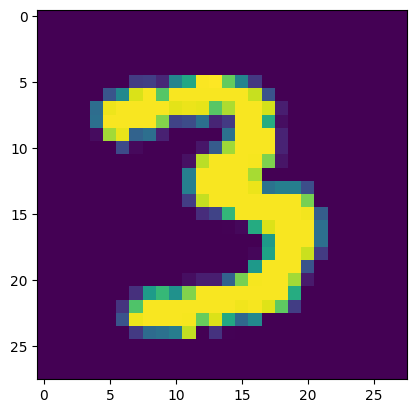

In [25]:
plt.imshow(x_test[500].reshape(28,28))

##使用資料集

##WEB API 互動

In [44]:
!pip install gradio --upgrade

In [47]:
import gradio as gr

ImportError: ignored

In [ ]:
def predict(img):
  y_pre = model.predict(img.reshape(1,784))
  return np.argmax(y_pre, axis=1)[0]

In [ ]:
webapi = gr.Interface(
    fn = predict,
    inputs = gr.Sketchpad(invert_colors=True),
    outputs = "text"
)

In [ ]:
webapi.launch(share = True)